##Basic Optimization

In this page we shall demosntrate how to use Scipy's optimization package.


Lets optimize $f(x) = \exp{(x-2)^2}$

In [1]:
!pip install scikit-optimize

  Obtaining dependency information for scikit-optimize from https://files.pythonhosted.org/packages/65/cd/15c9ebea645cc9860aa71fe0474f4be981f10ed8e19e1fb0ef1027d4966e/scikit_optimize-0.10.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for joblib>=0.11 from https://files.pythonhosted.org/packages/1e/e8/685f47e0d754320684db4425a0967f7d3fa70126bffd76110b7009a0090f/joblib-1.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for pyaml>=16.9 from https://files.pythonhosted.org/packages/a8/ee/a878f2ad010cbccb311f947f0f2f09d38f613938ee28c34e60fceecc75a1/pyaml-25.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for numpy>=1.20.3 from https://files.pythonhosted.org/packages/fd/77/dc2fcfc66943c6410e2bf598062f5959372735ffda175b39906d54f02349/numpy-2.2.6-cp310-cp310-macosx_14_0_arm64.whl.metadata
  Using cached numpy-2.2.6-cp310-cp310-macosx_14_0_arm64.whl.metadata (62 kB)
  Obtaining dependency information for scipy>=1.1.0 from https://files.python

In [2]:
import numpy as np
import matplotlib.pyplot as mp
import scipy as sp
from scipy import optimize
from scipy import fftpack
import skopt as opt

def f(y):
    return -np.exp(-(y-2)**2)

result = optimize.minimize_scalar(f)

print(result)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -1.0
       x: 1.9999999955459995
     nit: 6
    nfev: 10



###Using minimize function
We can also use Python's minimize or maximize function (with the ''key'' option) to optimize the function!

You can also pass more arguments.

Why to use the "optimize" function then?

ANSWER
The optimize functions are more suitable when working with continuous mathematical functions, especially when you need to apply specific constraints or use gradient-based methods. Additionally, they can efficiently solve problems in multiple dimensions.

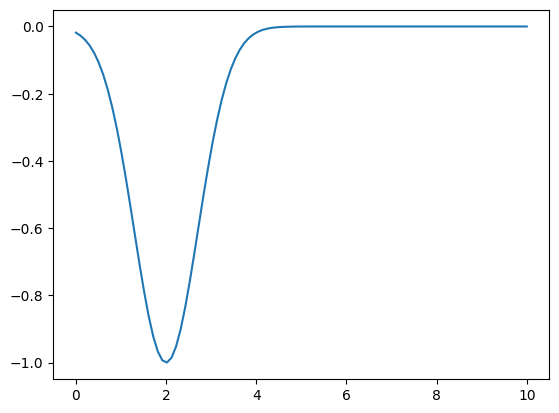

4.94949494949495
2.0202020202020203


In [14]:
y = np.linspace(0,10,100)
mp.plot(y,-np.exp(-(y-2)**2)); mp.show()
print(max(y, key=lambda x: np.sinc(x-5)))

print(min(y, key=lambda x: -np.exp(-(x-2)**2)))

###Rosenbrock function

Now we optimize the infamous Rosenbrock function.

$f(x,y) = 0.5*(1-x)^2 + (y - x^2)^2$

In [4]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2
optimize.minimize(f, [0,-1], method="CG")

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.2743806081839638e-11
       x: [ 1.000e+00  1.000e+00]
     nit: 8
     jac: [-2.100e-07  2.518e-06]
    nfev: 48
    njev: 16

What happens if we change the seed to something very far from the solution point?

ANSWER
When the initial seed is placed far from the optimal solution, the optimization algorithm requires substantially more iterations and function evaluations to converge. Starting from a distant point forces the optimizer to navigate through regions with steep gradients and complex curvature, making the convergence path longer and potentially less stable as it descends toward the minimum.

In [5]:
optimize.minimize(f, [200,-110], method="CG")

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 2.9893539643535623e-10
       x: [ 1.000e+00  1.000e+00]
     nit: 19
     jac: [ 6.787e-06  8.506e-06]
    nfev: 158
    njev: 52

**Constrained Optimization**

In this you need to give the constraints as well.

For example: $f(x) = 2xy + 2x - x^2 - 2 y^2$.

Constraints are as follows:

$x^3−y = 0$

$y−1 \geq 0$

In [15]:
def func(x, sign=1.0):
    """ Objective function """
    return sign*(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

cons = ({'type': 'eq',
          'fun' : lambda x: np.array([x[0]**3 - x[1]])},
        {'type': 'ineq',
          'fun' : lambda x: np.array([x[1] - 1])})

res = optimize.minimize(func, [-1.0,1.0], args=(-1.0,),
                method='SLSQP', options={'disp': True})
print(res.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.9999999999999973
            Iterations: 4
            Function evaluations: 13
            Gradient evaluations: 4
[1.99999994 0.99999995]


In [16]:
res = optimize.minimize(func, [-1.0,1.0], args=(-1.0,),
                constraints=cons, method='BFGS', options={'disp': True})

print(res.x)

Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 6
         Function evaluations: 21
         Gradient evaluations: 7
[2.00000024 1.00000014]


/var/folders/yv/dtkstvw97k9gncd48ftsh23w0000gn/T/ipykernel_30414/2978450912.py:1: RuntimeWarning: Method BFGS cannot handle constraints.
  res = optimize.minimize(func, [-1.0,1.0], args=(-1.0,),


## COMPRESSIVE SENSING

Now lets discuss about compressive sensing. Lets assume that we have some signal recorded (following Nyquist rate); lets call it $x$. Its size is $N$.

In the following signal we are using 500 samples and two sinusoids. You can note that one of them takes 10 samples per cycle; hence there are 50 cycles. So Nyquist will want us to have at least 100 samples in order to be able to know whats in the signal!

However if we look the signal through DCT then there are just two samples. Mark that we are using DCT and not FFT; because then we dont have to deal with complex numbers!



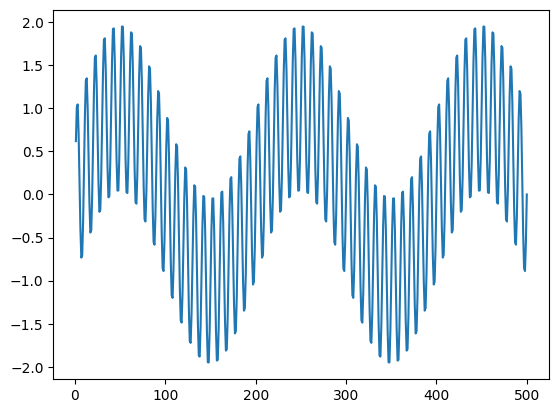

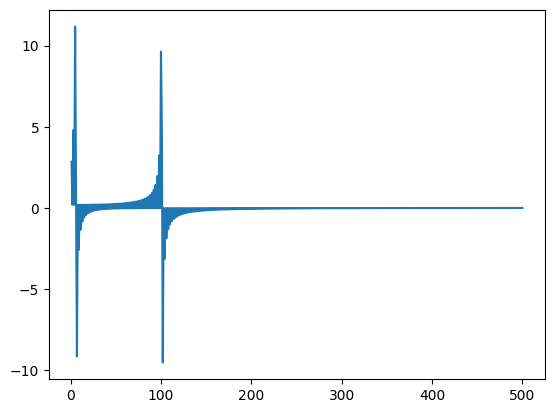

([<matplotlib.lines.Line2D at 0x11d13c250>], None)

In [17]:
n = np.linspace(1,500,500)

#two harmonics signal
xx = np.sin(2*np.pi*n/10) + np.sin(2*np.pi*n/200)  #+ np.sin(2*np.pi*n/50)
mp.plot(n,xx), mp.show()
mp.plot(n,fftpack.dct(xx, norm='ortho')), mp.show()

**Sparse Sampling** \\
Lets assume that we only consider $n$ of this ($n \ll N$).

For this lets define a sparsifying vector sp which has only $n$ 1's and rest zeros placed in random places.

So sparsed data $xp = xx*sp$.

The trick is that these $n$ samples are randomly taken.

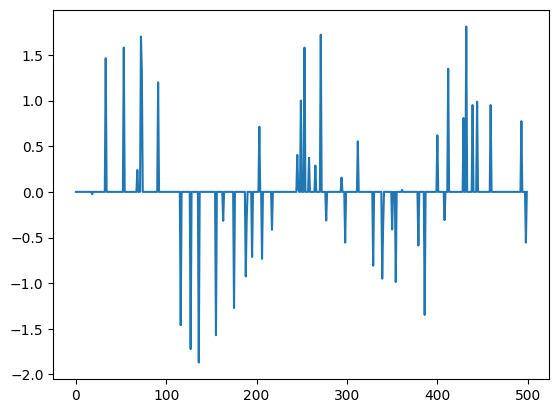

([<matplotlib.lines.Line2D at 0x11c042950>], None)

In [18]:
N = len(xx) #length of actual N
n = 50 #number of nonzero samples in our sparse signal
sp = np.array([1] * n + [0] * (N-n)) #n 1's and (N-n) 0's
np.random.shuffle(sp)

xp = xx*sp
mp.plot(xp), mp.show()

### Using Optimization
The trick of compressive sensing is that we try to use optimization in order to know the unknown from what is known!

So let us think what we know.

1- We know $xp$  the random-subNyquist-sampled signal and $sp$.

2- We know that the signal is sparse in DCT domain.

So lets try to look into the DCT domain. Lets assume that the DCT of the signal is $XX$. So IDCT of it should give us $xp$ back.

Lets define an optimization problem to do this.

What are the DCT samples that will give rise to a time domain signal which has the values of $xp$ at $sp$ time-indices. \\
We start with an intial estimate $XX$ which we will update in each iteration. \\
The cost function will be Euclidean distance between $xp$ and IDCT of $XX$.

         Current function value: 0.000001
         Iterations: 3
         Function evaluations: 43098
         Gradient evaluations: 86


/Users/juliaszymanska/MachineLearning/.venv/lib/python3.10/site-packages/scipy/optimize/_minimize.py:733: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


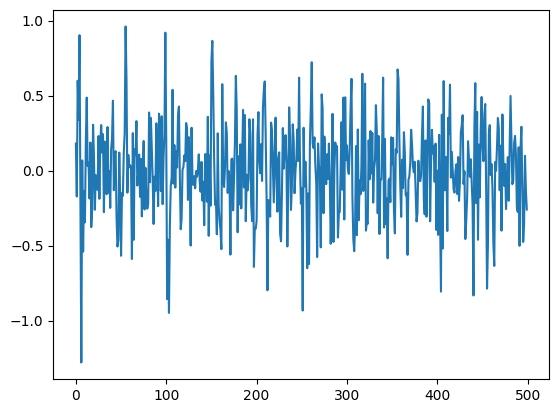

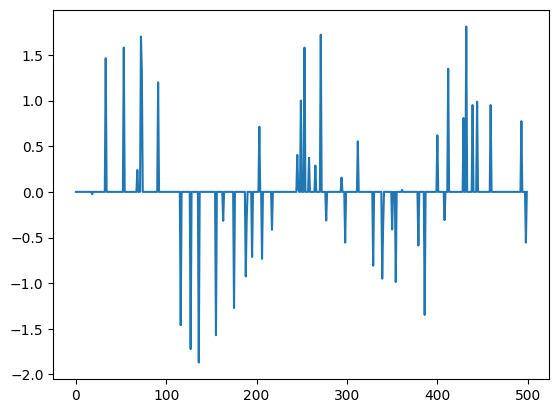

([<matplotlib.lines.Line2D at 0x11c122cb0>], None)

In [19]:

XX = np.random.rand(N)
def cost_cs(XX):   #given the measured xp and a generic X find the L1 norm
    xd = fftpack.idct(XX, norm='ortho') #derived x from X
    xdn = xd*sp
    return np.linalg.norm((xdn - xp), ord=2)

seed = np.zeros(N)

CS = optimize.minimize(cost_cs, seed, options={'disp': True})

xrecon = fftpack.idct(CS.x, norm='ortho')
mp.plot(CS.x), mp.show()
mp.plot(xrecon), mp.show()

### Redfining the Optimization
Hmmmm. Enen though the optimization has not finished doing its job if we look at the result we seem to have achieved what we asked for!

The reconstructed signal $xrecon$ looks exactly like $xp$. So we did achieve what we wanted (theoritically speaking) but we want more.

What else can we do?

Lets add a condition that we want to optimize $||xrecon - xp ||$ but we also want to keep XX sparse, i.e. the $L0$ norm of $XX$ should be less than $n$.

Iteration limit reached    (Exit mode 9)
            Current function value: 1.2725098159250182e-05
            Iterations: 100
            Function evaluations: 50960
            Gradient evaluations: 100


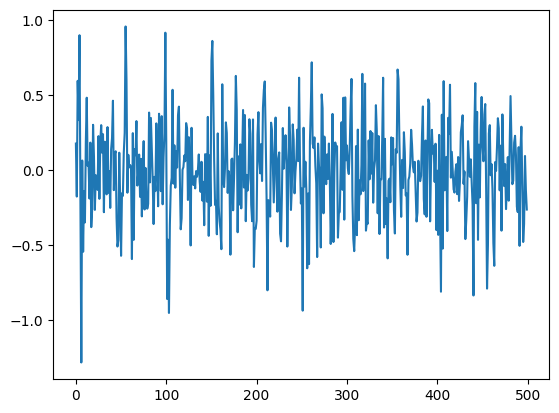

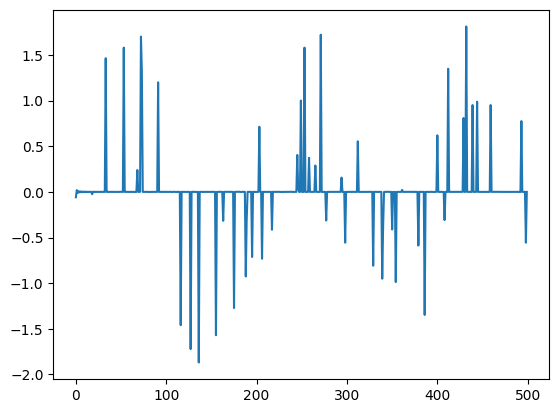

([<matplotlib.lines.Line2D at 0x11c203eb0>], None)

In [20]:
XX = np.random.rand(N)
def cost_cs(XX):   #given the measured xp and a generic X find the L1 norm
    xd = fftpack.idct(XX, norm='ortho') #derived x from X
    xdn = xd*sp
    return np.linalg.norm((xdn - xp), ord=2)

cons = ({'type': 'ineq',
          'fun' : lambda XX: n - np.linalg.norm(XX,ord=0)})

#seed = np.random.rand(N)
seed = np.zeros(N)

CS = optimize.minimize(cost_cs, seed, constraints=cons, options={'disp': True})

xrecon = fftpack.idct(CS.x, norm='ortho')
mp.plot(CS.x), mp.show()
mp.plot(xrecon), mp.show()

### Re-redfining the Optimization: L1 Magic!!
Hmmmm. It seems its not working the way we want it to work. What else can we do?

It seems achieving $xrecon = xp$ is an easy task, because its sparse anyway.

So lets keep this as a condition (instead of making it the cost-function). And minimize $XX$. And let us use $L1$ norm here so as to keep the error under control. Remember that even though $L2$ norm is smooth, it has a square and blows up the error. So in wildly uknown problems like what we dealing with here, its better to use $L1$ norm.

In [21]:
XX = np.random.rand(N)
def cost_cs(XX):   #given the measured xp and a generic X find the L1 norm
    return np.linalg.norm(XX, ord=1)

cons = ({'type': 'eq',
          'fun' : lambda XX : np.linalg.norm(xp - fftpack.idct(XX, norm='ortho')*sp, ord = 2)})

seed = np.random.rand(N)
#seed = np.zeros(N)

CS = optimize.minimize(cost_cs, seed, constraints=cons, options={'disp': True})

Iteration limit reached    (Exit mode 9)
            Current function value: 57.64309111476681
            Iterations: 100
            Function evaluations: 50422
            Gradient evaluations: 100


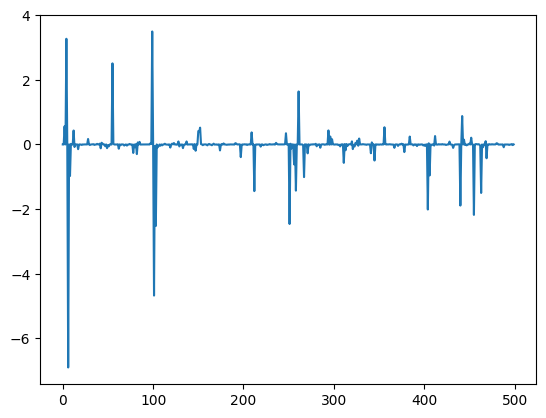

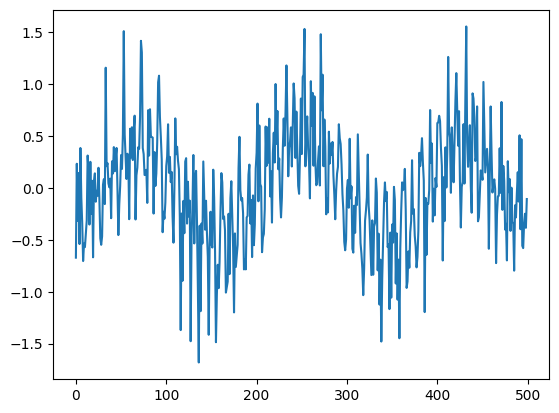

([<matplotlib.lines.Line2D at 0x11c3180a0>], None)

In [22]:
xrecon = fftpack.idct(CS.x, norm='ortho')
mp.plot(CS.x), mp.show()
mp.plot(xrecon), mp.show()

### Conclusion
Unfortunately the optimization process did not end. We need more iteration. However, we seem to have got something which looks pretty much like the signal we have started with. It is noisy but it is encouraging given the fact that we have got only half the number of samples as Nyquist would have wanted.

This is the starting of Compressive Sensing (CS). We have learnt two things.

1- It is easy to cheat Nyquist if the signal is sparse in some other linearly transferable domain. 2- Redefining the optimization problem can help us achieve magical results.

The hard-core CS involvs more interesting objective functions and constraints to achieve even more interesting magical results.

ANSWER
 In Earth Observation, compressive sensing addresses the challenge of handling huge datasets from orbital platforms. Many image regions exhibit redundancy, and features like water surfaces or atmospheric conditions can be accurately reconstructed from sparse sampling. Given limited downlink capabilities and storage resources, CS proves invaluable. Practical implementations span: hyperspectral data acquisition with reduced sampling rates, SAR image formation using minimal pulse transmissions, decreasing satellite payload requirements, and targeted reconstruction of relevant zones such as infrastructure expansion or vegetation changes. Overall, CS enables cost-effective and time-efficient observation missions while maintaining data fidelity.    